In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

area_type   availability                  location       size  \
0  Super built-up  Area         19-Dec  Electronic City Phase II      2 BHK   
1            Plot  Area  Ready To Move          Chikka Tirupathi  4 Bedroom   
2        Built-up  Area  Ready To Move               Uttarahalli      3 BHK   
3  Super built-up  Area  Ready To Move        Lingadheeranahalli      3 BHK   
4  Super built-up  Area  Ready To Move                  Kothanur      2 BHK   

   society total_sqft  bath  balcony   price  
0  Coomee        1056   2.0      1.0   39.07  
1  Theanmp       2600   5.0      3.0  120.00  
2      NaN       1440   2.0      3.0   62.00  
3  Soiewre       1521   3.0      1.0   95.00  
4      NaN       1200   2.0      1.0   51.00

In [3]:
df.shape

(13320, 9)

DataFrameGroupBy
Returns a groupby object that contains information about the groups.

In [4]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df.groupby('size')['size'].agg('count')

size
1 BHK          538
1 Bedroom      105
1 RK            13
10 BHK           2
10 Bedroom      12
11 BHK           2
11 Bedroom       2
12 Bedroom       1
13 BHK           1
14 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
2 BHK         5199
2 Bedroom      329
27 BHK           1
3 BHK         4310
3 Bedroom      547
4 BHK          591
4 Bedroom      826
43 Bedroom       1
5 BHK           59
5 Bedroom      297
6 BHK           30
6 Bedroom      191
7 BHK           17
7 Bedroom       83
8 BHK            5
8 Bedroom       84
9 BHK            8
9 Bedroom       46
Name: size, dtype: int64

assuming features can be neglected

In [6]:
df1=df.drop(['area_type','availability','society','balcony','availability'],axis=1)

In [7]:
df1.head()

location       size total_sqft  bath   price
0  Electronic City Phase II      2 BHK       1056   2.0   39.07
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00
2               Uttarahalli      3 BHK       1440   2.0   62.00
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00
4                  Kothanur      2 BHK       1200   2.0   51.00

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

since our has more than 13k rows we can drop null rows as they are less than 100

In [9]:
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(13246, 5)

In [11]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

lambda with apply  function applies to every element  of the column

In [12]:
df2['bhk']=df2['size'].apply(lambda x:int( x.split(' ')[0]))

<ipython-input-12-78e693ca2f84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int( x.split(' ')[0]))


In [13]:
df2.head()

location       size total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK       1056   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom       2600   5.0  120.00    4
2               Uttarahalli      3 BHK       1440   2.0   62.00    3
3        Lingadheeranahalli      3 BHK       1521   3.0   95.00    3
4                  Kothanur      2 BHK       1200   2.0   51.00    2

In [14]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [15]:
df2[df2.bhk>20]

location        size total_sqft  bath  price  bhk
1718  2Electronic City Phase II      27 BHK       8000  27.0  230.0   27
4684                Munnekollal  43 Bedroom       2400  40.0  660.0   43

In [16]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

location       size      total_sqft  bath    price  bhk
30            Yelahanka      4 BHK     2100 - 2850   4.0  186.000    4
122              Hebbal      4 BHK     3067 - 8156   4.0  477.000    4
137  8th Phase JP Nagar      2 BHK     1042 - 1105   2.0   54.005    2
165            Sarjapur      2 BHK     1145 - 1340   2.0   43.490    2
188            KR Puram      2 BHK     1015 - 1540   2.0   56.800    2
410             Kengeri      1 BHK  34.46Sq. Meter   1.0   18.500    1
549         Hennur Road      2 BHK     1195 - 1440   2.0   63.770    2
648             Arekere  9 Bedroom       4125Perch   9.0  265.000    9
661           Yelahanka      2 BHK     1120 - 1145   2.0   48.130    2
672        Bettahalsoor  4 Bedroom     3090 - 5002   4.0  445.000    4

In [19]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [20]:
df4 = df2.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head()

location       size  total_sqft  bath   price  bhk
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2

In [21]:
df5=df4.copy()

In [22]:
df5['price_per_sqft']=df5['price']*100000/df5['total_sqft']

In [23]:
df5.head(5)

location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000

In [24]:
len(df5.location.unique())

1298

In [25]:
df5.location=df5.location.apply(lambda x:x.strip())
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [26]:
len(location_stats[location_stats<=10])

1047

In [27]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [28]:
len(df5.location.unique())

1287

In [29]:
df5.location=df.location.apply(lambda x:'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

282

In [30]:
df5

location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13315                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13316                     other      4 BHK      3600.0   5.0  400.00    4   
13317     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13318           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13319              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0         3699.810606  
1         4615.384615  
2         4305.555556  
3         6245.890861  
4         4250.000000  
...               ...  
13315     6689.834926  
13316    11111.111111  
13317     5258.545136  
13318    10407.336319  
13319     3090.909091  

[13200 rows x 7 columns]

## outliers in data

In [31]:
df5[df5.total_sqft/df5.bhk <300].head()

location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000

In [32]:
df6=df5[~(df5.total_sqft/df5.bhk <300)]

In [33]:
df6.shape

(12456, 7)

In [34]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [35]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft <=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7=remove_pps_outliers(df6)
df7.shape

(10202, 7)

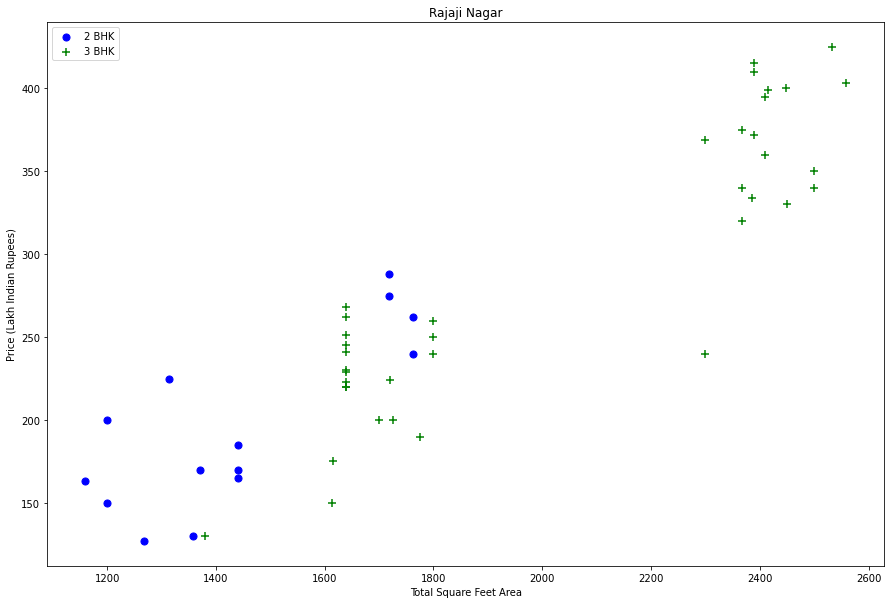

In [36]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area") 
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,"Rajaji Nagar")

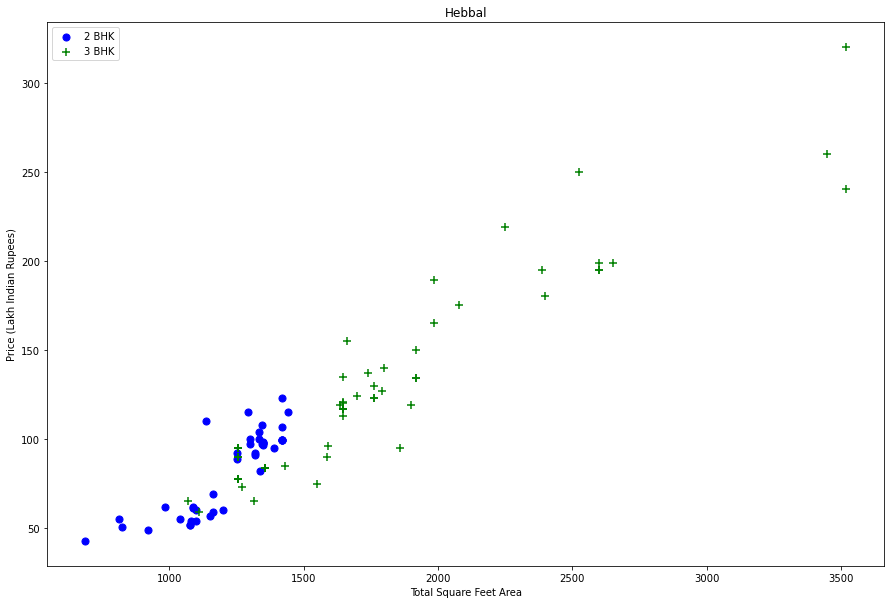

In [37]:
plot_scatter_chart(df7,"Hebbal")

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7313, 7)

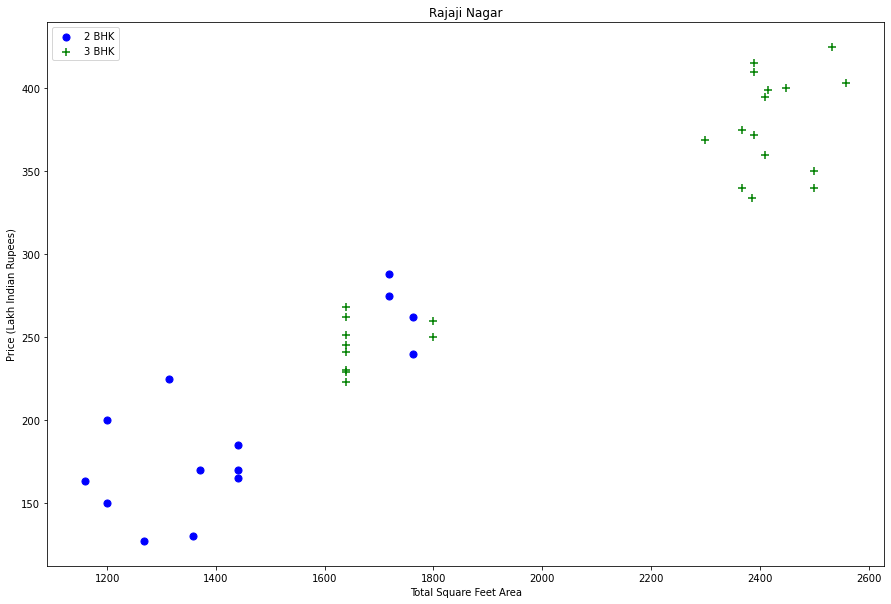

In [49]:

plot_scatter_chart(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

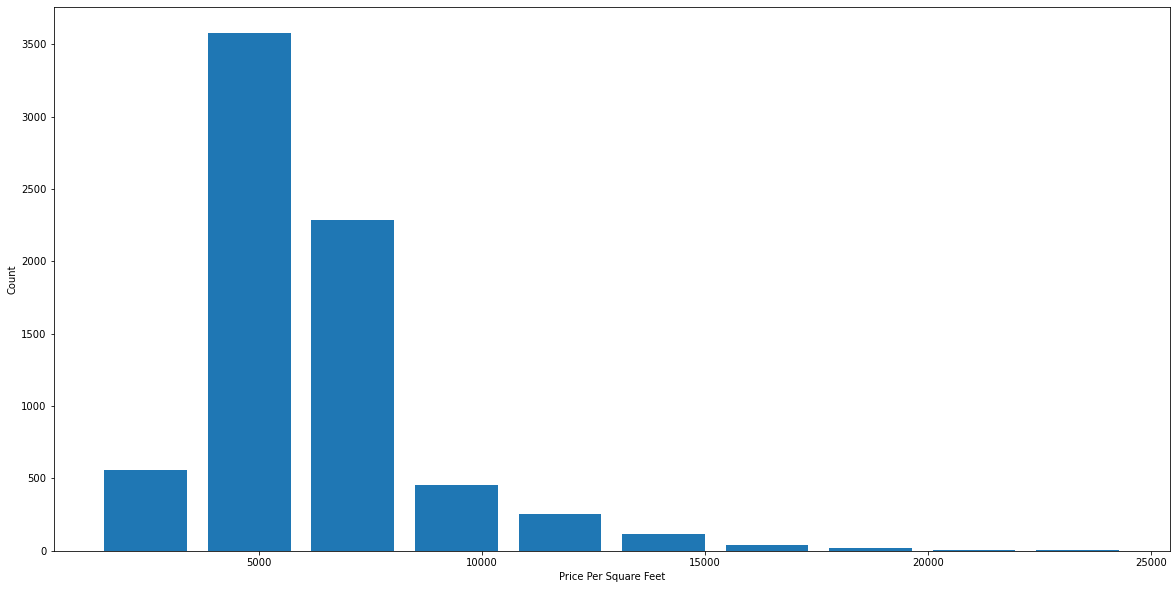

In [50]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")


In [51]:
df8.bath.unique()

array([ 3.,  2.,  1.,  4.,  5.,  8.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

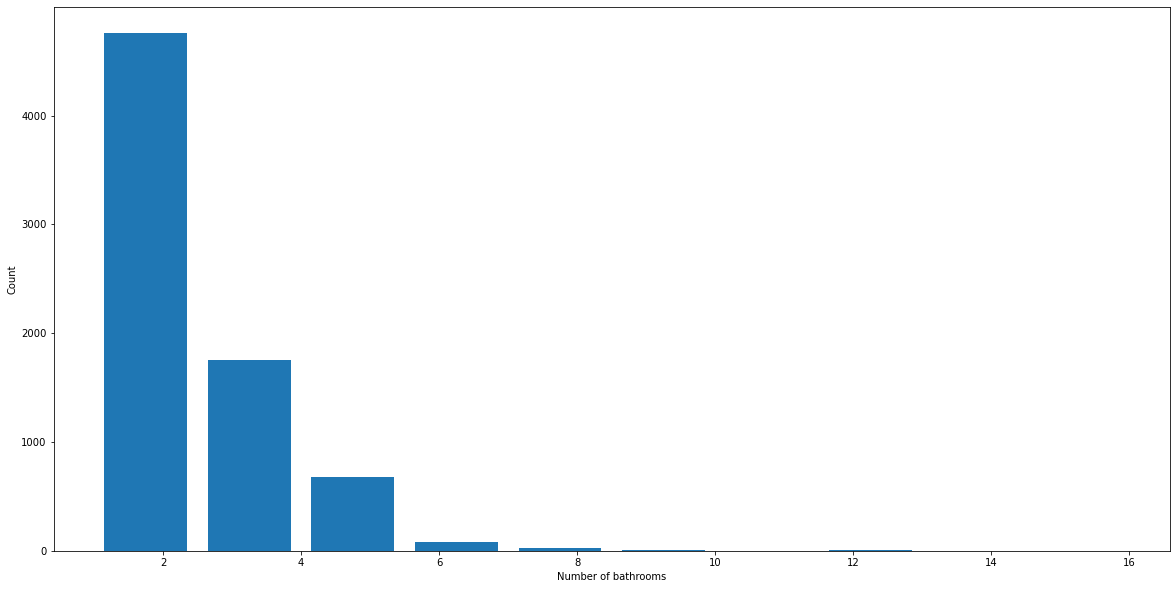

In [52]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [53]:
df8[df8.bath>10]

location    size  total_sqft  bath  price  bhk  price_per_sqft
5292  Neeladri Nagar  10 BHK      4000.0  12.0  160.0   10     4000.000000
8494           other  10 BHK     12000.0  12.0  525.0   10     4375.000000
8580           other  16 BHK     10000.0  16.0  550.0   16     5500.000000
9294           other  11 BHK      6000.0  12.0  150.0   11     2500.000000
9616           other  13 BHK      5425.0  13.0  275.0   13     5069.124424

In [54]:
df8[df8.bath>df8.bhk+2]

location       size  total_sqft  bath   price  bhk  price_per_sqft
1647  Chikkabanavar  4 Bedroom      2460.0   7.0    80.0    4     3252.032520
5253     Nagasandra  4 Bedroom      7000.0   8.0   450.0    4     6428.571429
6733    Thanisandra      3 BHK      1806.0   6.0   116.0    3     6423.034330
8424          other      6 BHK     11338.0   9.0  1000.0    6     8819.897689

In [55]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7235, 7)

In [56]:
df9.head(2)

location   size  total_sqft  bath  price  bhk  price_per_sqft
0   Devarabeesana Halli  3 BHK      1672.0   3.0  150.0    3     8971.291866
1   Devarabeesana Halli  3 BHK      1750.0   3.0  149.0    3     8514.285714

In [57]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)

location  total_sqft  bath  price  bhk
0   Devarabeesana Halli      1672.0   3.0  150.0    3
1   Devarabeesana Halli      1750.0   3.0  149.0    3
2   Devarabeesana Halli      1750.0   3.0  150.0    3

In [58]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

Devarabeesana Halli   Devarachikkanahalli   Electronic City  \
0                     1                     0                 0   
1                     1                     0                 0   
2                     1                     0                 0   

    Mysore Highway   Rachenahalli   Thanisandra   south  1st Block Jayanagar  \
0                0              0             0       0                    0   
1                0              0             0       0                    0   
2                0              0             0       0                    0   

   1st Phase JP Nagar  2nd Phase Judicial Layout  ...  Vishwapriya Layout  \
0                   0                          0  ...                   0   
1                   0                          0  ...                   0   
2                   0                          0  ...                   0   

   Vittasandra  Whitefield  Whitefield,   Yelachenahalli  Yelahanka  \
0            0           0             0               0          0   
1            0           0             0               0          0   
2            0           0             0               0          0   

   Yelahanka New Town  Yelenahalli  Yeshwanthpur  other  
0                   0            0             0      0  
1                   0            0             0      0  
2                   0            0             0      0  

[3 rows x 259 columns]

In [59]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

location  total_sqft  bath  price  bhk   Devarabeesana Halli  \
0   Devarabeesana Halli      1672.0   3.0  150.0    3                     1   
1   Devarabeesana Halli      1750.0   3.0  149.0    3                     1   
2   Devarabeesana Halli      1750.0   3.0  150.0    3                     1   
4   Devarachikkanahalli      1250.0   2.0   40.0    2                     0   
5   Devarachikkanahalli      1200.0   2.0   83.0    2                     0   

    Devarachikkanahalli   Electronic City   Mysore Highway   Rachenahalli  \
0                     0                 0                0              0   
1                     0                 0                0              0   
2                     0                 0                0              0   
4                     1                 0                0              0   
5                     1                 0                0              0   

   ...  Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0  ...                     0                   0            0           0   
1  ...                     0                   0            0           0   
2  ...                     0                   0            0           0   
4  ...                     0                   0            0           0   
5  ...                     0                   0            0           0   

   Whitefield,   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  \
0             0               0          0                   0            0   
1             0               0          0                   0            0   
2             0               0          0                   0            0   
4             0               0          0                   0            0   
5             0               0          0                   0            0   

   Yeshwanthpur  
0             0  
1             0  
2             0  
4             0  
5             0  

[5 rows x 263 columns]

In [60]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

total_sqft  bath  price  bhk   Devarabeesana Halli   Devarachikkanahalli  \
0      1672.0   3.0  150.0    3                     1                     0   
1      1750.0   3.0  149.0    3                     1                     0   

    Electronic City   Mysore Highway   Rachenahalli   Thanisandra  ...  \
0                 0                0              0             0  ...   
1                 0                0              0             0  ...   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                     0                   0            0           0   

   Whitefield,   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  \
0             0               0          0                   0            0   
1             0               0          0                   0            0   

   Yeshwanthpur  
0             0  
1             0  

[2 rows x 262 columns]

In [61]:
df12.shape

(7235, 262)

In [62]:
X = df12.drop(['price'],axis='columns')
X.head(3)

total_sqft  bath  bhk   Devarabeesana Halli   Devarachikkanahalli  \
0      1672.0   3.0    3                     1                     0   
1      1750.0   3.0    3                     1                     0   
2      1750.0   3.0    3                     1                     0   

    Electronic City   Mysore Highway   Rachenahalli   Thanisandra   south  \
0                 0                0              0             0       0   
1                 0                0              0             0       0   
2                 0                0              0             0       0   

   ...  Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0  ...                     0                   0            0           0   
1  ...                     0                   0            0           0   
2  ...                     0                   0            0           0   

   Whitefield,   Yelachenahalli  Yelahanka  Yelahanka New Town  Yelenahalli  \
0             0               0          0                   0            0   
1             0               0          0                   0            0   
2             0               0          0                   0            0   

   Yeshwanthpur  
0             0  
1             0  
2             0  

[3 rows x 261 columns]

In [63]:
X.shape

(7235, 261)

In [64]:
y = df12.price
y.head(3)

0    150.0
1    149.0
2    150.0
Name: price, dtype: float64

In [65]:
len(y)

7235

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.79863031172398

In [68]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([ 8.06909490e-01, -1.29956301e+13,  8.14583626e-01,  8.81083300e-01,
       -7.31909049e+12])

In [69]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

model    best_score                                 best_params
0  linear_regression -4.062944e+12                        {'normalize': False}
1              lasso  6.986311e-01         {'alpha': 1, 'selection': 'cyclic'}
2      decision_tree  7.382569e-01  {'criterion': 'mse', 'splitter': 'random'}

In [70]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [71]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

93.35000294157298

In [72]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

98.70896529769547

In [73]:
predict_price('Indira Nagar',1000, 2, 2)

182.86026154923022

In [74]:
predict_price('Indira Nagar',1000, 3, 3)

188.2192239053527

In [75]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)